# Months and Days

This notebook contains analysis on how different months and days of the month compare wrt. delays.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from helper_functions import group_data_reliability

In [15]:
# Load data
flights = pd.read_csv("data/filtered_flights.csv")


In [16]:
# Defining "on time" threshold as 15 minutes
on_time_threshold = 15

# Creating new variables saying whether a flight was delayed on departure and arrival, respectively
flights["dep_on_time"] = (flights["DEPARTURE_DELAY"] <= on_time_threshold).astype(int)
flights["arr_on_time"] = (flights["ARRIVAL_DELAY"] <= on_time_threshold).astype(int)


## Monthly Delay Analysis
This section explores how flight delays vary across different months of the year, examining both average delays and on-time rates.


In [17]:
# Aggregating by month
summary_performance_month = group_data_reliability(flights, "MONTH")

# Sort by month number
summary_performance_month = summary_performance_month.sort_index()


Below is a table showing on time arrivals and departures as well as average arrival and departure delays by month.


In [18]:
# Create a formatted table
month_table = summary_performance_month[["n_flights",
                                         "arr_on_time_rate", "dep_on_time_rate",
                                         "mean_arr_delay", "mean_dep_delay"]
                                        ].rename(columns={
                                            "n_flights": "Total Flights",
                                            "arr_on_time_rate": "On Time Arrivals (Rate)",
                                            "dep_on_time_rate": "On Time Departures (Rate)",
                                            "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                            "mean_dep_delay": "Average Departure Delay (Minutes)"
                                        }).reset_index()

# Add month names
month_names = {1: "January", 2: "February", 3: "March", 4: "April",
               5: "May", 6: "June", 7: "July", 8: "August",
               9: "September", 10: "October", 11: "November", 12: "December"}
month_table["Month"] = month_table["MONTH"].map(month_names)
month_table = month_table[["Month", "Total Flights", "On Time Arrivals (Rate)",
                           "On Time Departures (Rate)", "Average Arrival Delay (Minutes)",
                           "Average Departure Delay (Minutes)"]]

dfi.export(month_table, "figures/df_flights_months.png", table_conversion="matplotlib")
month_table


,Month,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,January,57331,0.799323,0.820307,6.296069,8.187103
1,February,51887,0.795536,0.799680,6.177883,9.521592
2,March,59381,0.804634,0.816911,5.908526,8.466741
3,April,58122,0.839579,0.832611,2.651358,7.409653
4,May,59821,0.809632,0.804283,5.022416,9.055392
5,June,60412,0.781914,0.775541,7.324353,11.772874
6,July,63052,0.767652,0.760864,7.791537,12.572607
7,August,62791,0.801962,0.797598,5.198773,9.902271
8,September,57850,0.867468,0.868643,0.189811,5.034868
9,November,56536,0.852413,0.839943,0.317161,7.087673


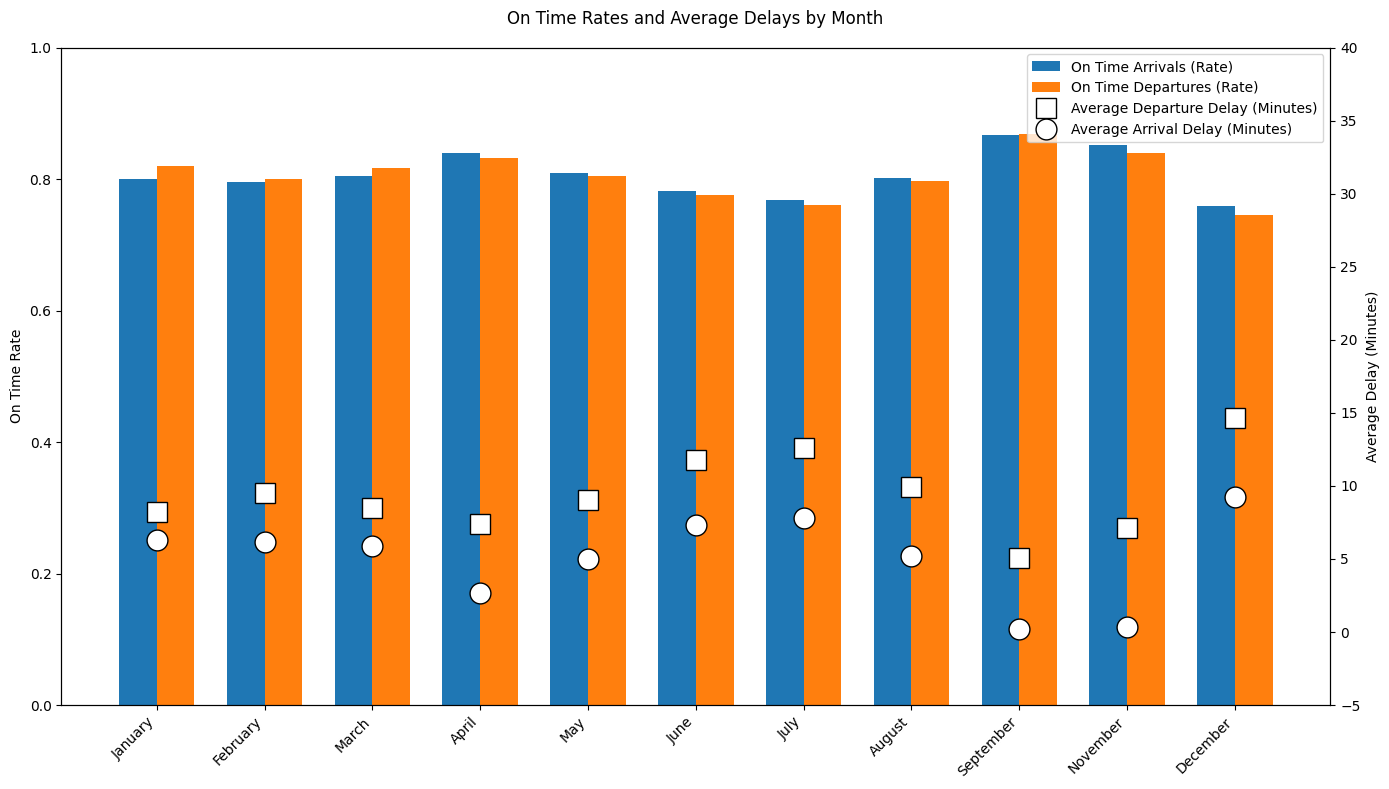

In [19]:
# Create bar chart for monthly delays
fig, ax1 = plt.subplots(figsize=(14, 8))

# On Time Rates
width = 0.35
x_pos = np.arange(len(summary_performance_month))
month_labels = [month_names[i] for i in summary_performance_month.index]

ax1.bar(x_pos - width/2, 
        summary_performance_month["arr_on_time_rate"], width, label="On Time Arrivals (Rate)")
ax1.bar(x_pos + width/2, 
        summary_performance_month["dep_on_time_rate"], width, label="On Time Departures (Rate)")
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(month_labels, rotation=45, ha="right")

# Average Delays
ax2 = ax1.twinx()
ax2.plot(x_pos, 
         summary_performance_month["mean_dep_delay"], marker="s", markersize=15, 
         linestyle="None", label="Average Departure Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.plot(x_pos, 
         summary_performance_month["mean_arr_delay"], marker="o", markersize=15, 
         linestyle="None", label="Average Arrival Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.set_ylim(-5, 40)
ax2.set_ylabel("Average Delay (Minutes)")

# Title
fig.suptitle("On Time Rates and Average Delays by Month")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()

plt.savefig("figures/delays_by_month.png", dpi=300, bbox_inches='tight')

plt.show()

In [20]:
# Aggregating by day of month
summary_performance_day = group_data_reliability(flights, "DAY")

# Sort by day number
summary_performance_day = summary_performance_day.sort_index()


In [21]:
# Create a formatted table
day_table = summary_performance_day[["n_flights",
                                     "arr_on_time_rate", "dep_on_time_rate",
                                     "mean_arr_delay", "mean_dep_delay"]
                                    ].rename(columns={
                                        "n_flights": "Total Flights",
                                        "arr_on_time_rate": "On Time Arrivals (Rate)",
                                        "dep_on_time_rate": "On Time Departures (Rate)",
                                        "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                        "mean_dep_delay": "Average Departure Delay (Minutes)"
                                    }).reset_index()

day_table = day_table.rename(columns={"DAY": "Day of Month"})
day_table = day_table[["Day of Month", "Total Flights", "On Time Arrivals (Rate)",
                       "On Time Departures (Rate)", "Average Arrival Delay (Minutes)",
                       "Average Departure Delay (Minutes)"]]

dfi.export(month_table, "figures/df_flights_days.png", table_conversion="matplotlib")
day_table


,Day of Month,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,1,20900,0.815550,0.810383,4.688888,9.224856
1,2,21739,0.788859,0.785455,6.144059,10.541512
2,3,21449,0.815516,0.813231,4.132903,8.606191
3,4,21165,0.809213,0.803449,4.840499,9.329607
4,5,21052,0.800732,0.803914,5.884538,9.808428
5,6,21171,0.799868,0.801049,5.385201,9.328209
6,7,20627,0.839337,0.837107,1.813376,6.513215
7,8,21371,0.798418,0.794020,5.673279,10.212737
8,9,21470,0.812902,0.809921,4.081258,8.795746
9,10,21348,0.814737,0.805556,3.956448,9.148429


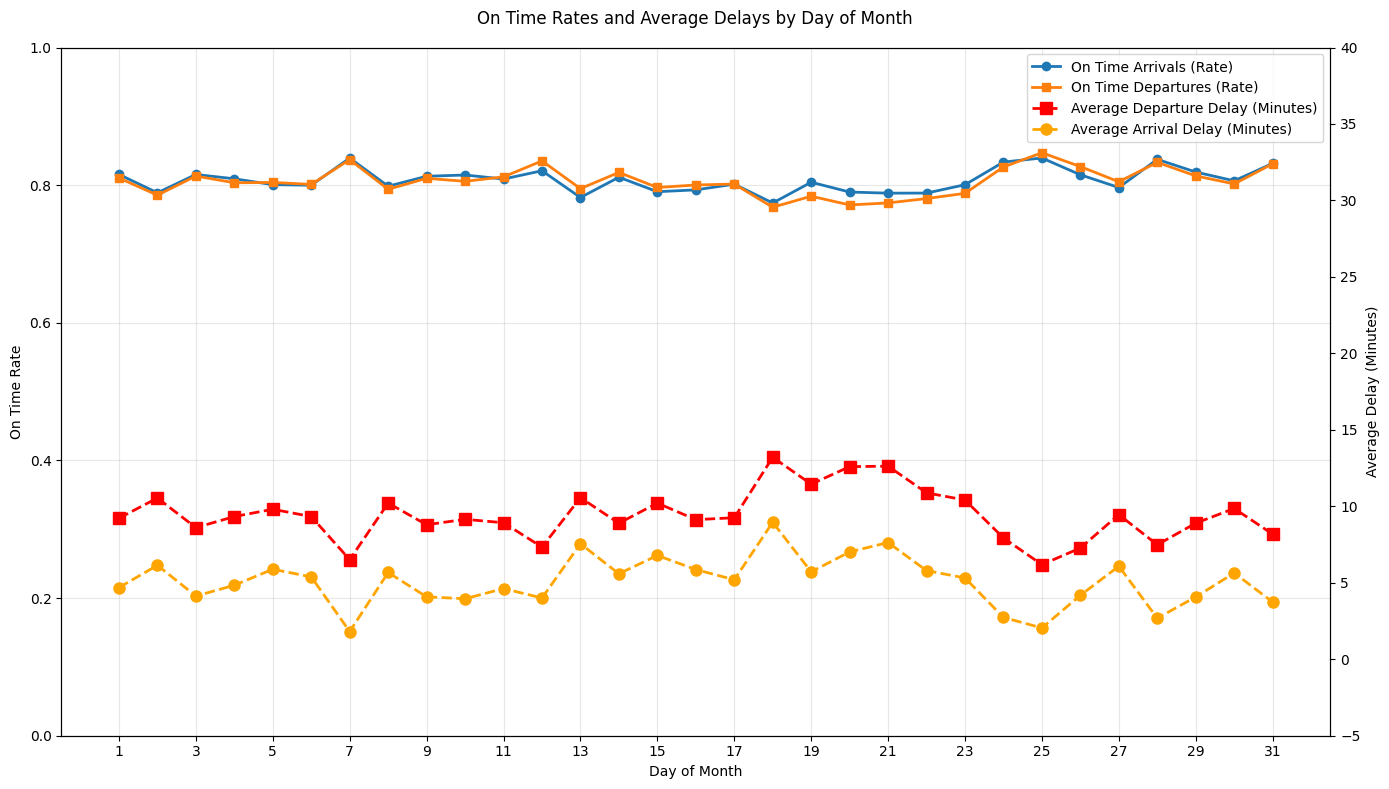

In [22]:
# Create line plot for delays by day of month
fig, ax1 = plt.subplots(figsize=(14, 8))

# On Time Rates
ax1.plot(summary_performance_day.index, 
         summary_performance_day["arr_on_time_rate"], 
         marker="o", label="On Time Arrivals (Rate)", linewidth=2)
ax1.plot(summary_performance_day.index, 
         summary_performance_day["dep_on_time_rate"], 
         marker="s", label="On Time Departures (Rate)", linewidth=2)
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xlabel("Day of Month")
ax1.set_xticks(range(1, 32, 2))
ax1.grid(True, alpha=0.3)

# Average Delays
ax2 = ax1.twinx()
ax2.plot(summary_performance_day.index, 
         summary_performance_day["mean_dep_delay"], 
         marker="s", markersize=8, label="Average Departure Delay (Minutes)", 
         linestyle="--", linewidth=2, color="red")
ax2.plot(summary_performance_day.index, 
         summary_performance_day["mean_arr_delay"], 
         marker="o", markersize=8, label="Average Arrival Delay (Minutes)", 
         linestyle="--", linewidth=2, color="orange")
ax2.set_ylim(-5, 40)
ax2.set_ylabel("Average Delay (Minutes)")

# Title
fig.suptitle("On Time Rates and Average Delays by Day of Month")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()

plt.savefig("figures/delays_by_day.png", dpi=300, bbox_inches='tight')

plt.show()

In [23]:
# Day-of-week delay analysis

# In the original Kaggle flights data, DAY_OF_WEEK is:
# 1 = Monday, 2 = Tuesday, ..., 7 = Sunday

summary_performance_dow = group_data_reliability(flights, "DAY_OF_WEEK")
summary_performance_dow = summary_performance_dow.sort_index()

# Map numeric day of week to names
dow_names = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}

dow_table = (
    summary_performance_dow[
        ["n_flights", "arr_on_time_rate", "dep_on_time_rate",
         "mean_arr_delay", "mean_dep_delay"]
        ]
    .rename(columns={
        "n_flights": "Total Flights",
        "arr_on_time_rate": "On Time Arrivals (Rate)",
        "dep_on_time_rate": "On Time Departures (Rate)",
        "mean_arr_delay": "Average Arrival Delay (Minutes)",
        "mean_dep_delay": "Average Departure Delay (Minutes)"
    })
    .reset_index()
)

dow_table["Day of Week"] = dow_table["DAY_OF_WEEK"].map(dow_names)
dow_table = dow_table[
    ["Day of Week", "Total Flights",
     "On Time Arrivals (Rate)", "On Time Departures (Rate)",
     "Average Arrival Delay (Minutes)", "Average Departure Delay (Minutes)"]
]

dfi.export(month_table, "figures/df_flights_dow.png", table_conversion="matplotlib")
dow_table


,Day of Week,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,Monday,96629,0.786027,0.784971,6.850157,10.984757
1,Tuesday,94515,0.816241,0.813585,3.983212,8.448567
2,Wednesday,95664,0.827762,0.823037,3.215092,7.749026
3,Thursday,95754,0.791299,0.790724,6.413493,10.461795
4,Friday,94493,0.796768,0.795625,6.237937,10.356115
5,Saturday,77066,0.853463,0.852075,1.479301,6.348848
6,Sunday,90829,0.784309,0.783439,7.056912,11.328469


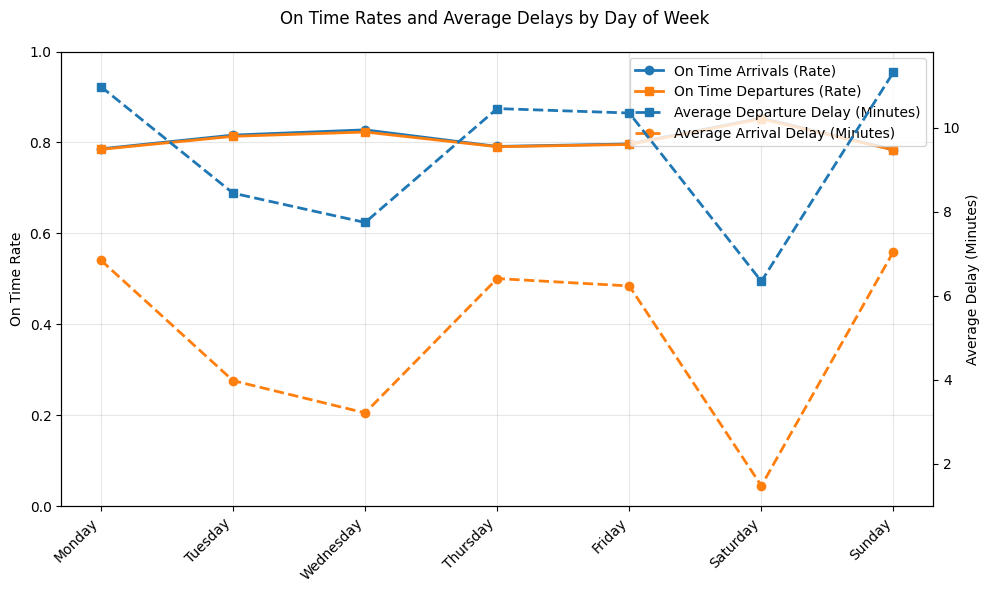

In [24]:
# Plot: on-time rates and delays by day of week

fig, ax1 = plt.subplots(figsize=(10, 6))

x_pos = np.arange(1, 8)
dow_labels = [dow_names[i] for i in x_pos]

# On time rates
ax1.plot(
    x_pos,
    summary_performance_dow["arr_on_time_rate"],
    marker="o",
    linewidth=2,
    label="On Time Arrivals (Rate)",
)
ax1.plot(
    x_pos,
    summary_performance_dow["dep_on_time_rate"],
    marker="s",
    linewidth=2,
    label="On Time Departures (Rate)",
)
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(dow_labels, rotation=45, ha="right")
ax1.grid(True, alpha=0.3)

# Average delays
ax2 = ax1.twinx()
ax2.plot(
    x_pos,
    summary_performance_dow["mean_dep_delay"],
    marker="s",
    linestyle="--",
    linewidth=2,
    label="Average Departure Delay (Minutes)",
)
ax2.plot(
    x_pos,
    summary_performance_dow["mean_arr_delay"],
    marker="o",
    linestyle="--",
    linewidth=2,
    label="Average Arrival Delay (Minutes)",
)
ax2.set_ylabel("Average Delay (Minutes)")

fig.suptitle("On Time Rates and Average Delays by Day of Week")

# Combined legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper right")

plt.tight_layout()

plt.savefig("figures/delays_by_dow.png", dpi=300, bbox_inches="tight")

plt.show()

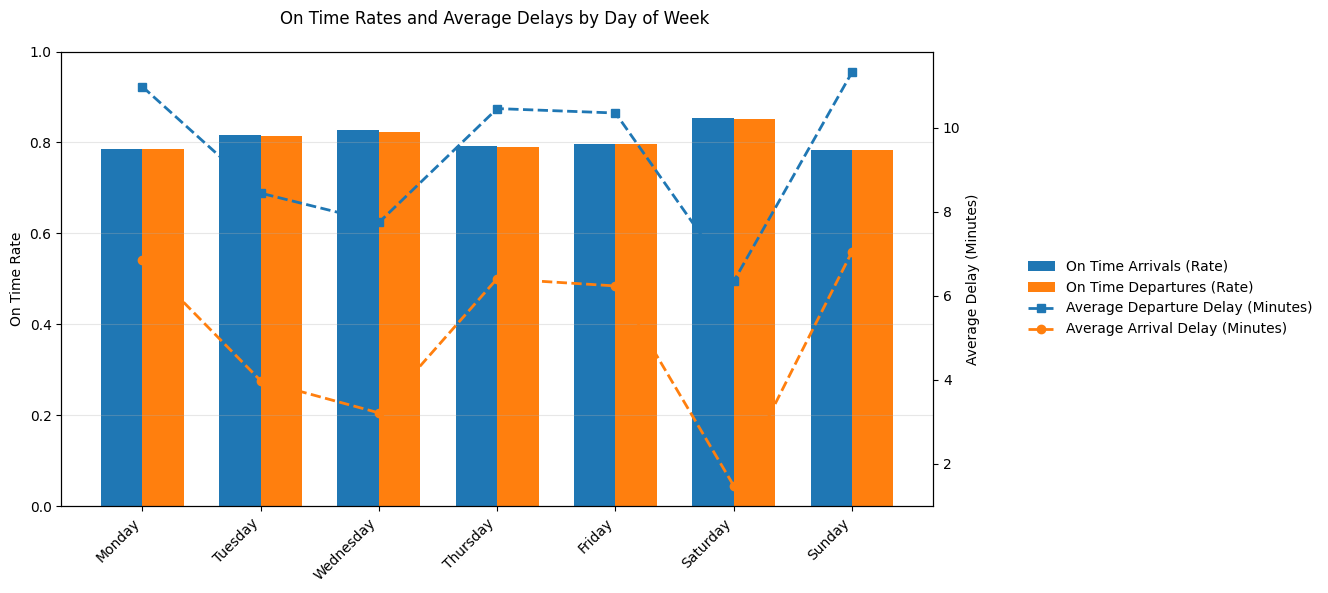

In [25]:
# Plot: on-time rates (bars) and delays (lines) by day of week

fig, ax1 = plt.subplots(figsize=(10, 6))

x_pos = np.arange(1, 8)
dow_labels = [dow_names[i] for i in x_pos]
width = 0.35

# On-time rates (bars)
ax1.bar(
    x_pos - width/2,
    summary_performance_dow["arr_on_time_rate"],
    width,
    label="On Time Arrivals (Rate)",
)
ax1.bar(
    x_pos + width/2,
    summary_performance_dow["dep_on_time_rate"],
    width,
    label="On Time Departures (Rate)",
)

ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(dow_labels, rotation=45, ha="right")
ax1.grid(axis="y", alpha=0.3)

# Average delays (lines, second y-axis) 
ax2 = ax1.twinx()
ax2.plot(
    x_pos,
    summary_performance_dow["mean_dep_delay"],
    marker="s",
    linestyle="--",
    linewidth=2,
    label="Average Departure Delay (Minutes)",
)
ax2.plot(
    x_pos,
    summary_performance_dow["mean_arr_delay"],
    marker="o",
    linestyle="--",
    linewidth=2,
    label="Average Arrival Delay (Minutes)",
)
ax2.set_ylabel("Average Delay (Minutes)")

# --- Title & legend ---
fig.suptitle("On Time Rates and Average Delays by Day of Week")

# Combined legend (outside plot)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

fig.legend(
    h1 + h2,
    l1 + l2,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),  # move legend outside
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on the right


plt.tight_layout()
plt.savefig("figures/delays_by_dow_bar.png", dpi=300, bbox_inches="tight")
plt.show()


Saturday has the best on time rate and lowest average departure delay. We can that the average on time rate is not that much higher but the average rate delay in minutes is substantially less. 

In [26]:
import pandas as pd
import numpy as np

# Load data
flights = pd.read_csv("data/filtered_flights.csv")

#configs and dat
ON_TIME_THRESHOLD = 15   # minutes
SEVERE_30 = 30
SEVERE_60 = 60

#months

def summarize_by_calendar(df: pd.DataFrame, group_col: str) -> pd.DataFrame:
    """
    Computes calendar-themed summary stats (months/days):
      - volume
      - on-time rates (arr/dep)
      - mean/median/std
      - tail risk (p90/p95)
      - severe delay rates (>30, >60)
      - cancellation rate (if CANCELLED exists)
    """
    d = df.copy()

    # Make sure delay columns exist
    for col in ["ARRIVAL_DELAY", "DEPARTURE_DELAY"]:
        if col not in d.columns:
            raise ValueError(f"Missing required column: {col}")

    # On-time indicators (treat NaN delays (often cancellations) as not on-time)
    d["arr_on_time"] = ((d["ARRIVAL_DELAY"] <= ON_TIME_THRESHOLD) & d["ARRIVAL_DELAY"].notna()).astype(int)
    d["dep_on_time"] = ((d["DEPARTURE_DELAY"] <= ON_TIME_THRESHOLD) & d["DEPARTURE_DELAY"].notna()).astype(int)

    def p(q):
        return lambda x: np.nanquantile(x, q)

    agg = {
        # volume
        "n_flights": ("ARRIVAL_DELAY", "size"),

        # reliability
        "arr_on_time_rate": ("arr_on_time", "mean"),
        "dep_on_time_rate": ("dep_on_time", "mean"),

        # mean/median
        "mean_arr_delay": ("ARRIVAL_DELAY", "mean"),
        "median_arr_delay": ("ARRIVAL_DELAY", "median"),
        "mean_dep_delay": ("DEPARTURE_DELAY", "mean"),
        "median_dep_delay": ("DEPARTURE_DELAY", "median"),

        # std
        "std_arr_delay": ("ARRIVAL_DELAY", "std"),
        "std_dep_delay": ("DEPARTURE_DELAY", "std"),

        # tail risk
        "p90_arr_delay": ("ARRIVAL_DELAY", p(0.90)),
        "p95_arr_delay": ("ARRIVAL_DELAY", p(0.95)),
        "p90_dep_delay": ("DEPARTURE_DELAY", p(0.90)),
        "p95_dep_delay": ("DEPARTURE_DELAY", p(0.95)),

        # severe delay rates
        "pct_arr_delay_gt30": ("ARRIVAL_DELAY", lambda x: np.nanmean(x > SEVERE_30)),
        "pct_arr_delay_gt60": ("ARRIVAL_DELAY", lambda x: np.nanmean(x > SEVERE_60)),
        "pct_dep_delay_gt30": ("DEPARTURE_DELAY", lambda x: np.nanmean(x > SEVERE_30)),
        "pct_dep_delay_gt60": ("DEPARTURE_DELAY", lambda x: np.nanmean(x > SEVERE_60)),
    }

    out = d.groupby(group_col).agg(**agg)

    # cancellation rate if available
    if "CANCELLED" in d.columns:
        out["cancel_rate"] = d.groupby(group_col)["CANCELLED"].mean()

    # nicer rounding (optional)
    rate_cols = [c for c in out.columns if "rate" in c or c.startswith("pct_")]
    out[rate_cols] = out[rate_cols].round(4)
    out = out.round(2)

    return out.reset_index()

#Month summary
month_summary = summarize_by_calendar(flights, "MONTH").sort_values("MONTH")

# add month names (optional)
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
month_summary["Month"] = month_summary["MONTH"].map(month_names)

# Put Month name first (optional)
cols = ["Month"] + [c for c in month_summary.columns if c not in ["Month"]]
month_summary = month_summary[cols]

display(month_summary)


#day of month summary
day_summary = summarize_by_calendar(flights, "DAY").sort_values("DAY")
display(day_summary)


,Month,MONTH,n_flights,arr_on_time_rate,dep_on_time_rate,mean_arr_delay,median_arr_delay,mean_dep_delay,median_dep_delay,std_arr_delay,std_dep_delay,p90_arr_delay,p95_arr_delay,p90_dep_delay,p95_dep_delay,pct_arr_delay_gt30,pct_arr_delay_gt60,pct_dep_delay_gt30,pct_dep_delay_gt60,cancel_rate
0,January,1,57331,0.80,0.82,6.30,-2.0,8.19,-2.0,35.63,34.19,34.0,63.0,33.0,64.0,0.11,0.05,0.10,0.05,0.01
1,February,2,51887,0.80,0.80,6.18,-3.0,9.52,-1.0,37.26,35.64,35.0,67.0,36.0,68.0,0.11,0.06,0.11,0.06,0.02
2,March,3,59381,0.80,0.82,5.91,-2.0,8.47,-1.0,34.90,33.70,34.0,59.0,33.0,61.0,0.11,0.05,0.11,0.05,0.01
3,April,4,58122,0.84,0.83,2.65,-5.0,7.41,-2.0,33.77,32.45,27.0,53.0,29.0,56.0,0.09,0.04,0.09,0.05,0.01
4,May,5,59821,0.81,0.80,5.02,-3.0,9.06,-1.0,34.32,33.07,34.0,62.0,35.0,64.0,0.11,0.05,0.11,0.05,0.01
5,June,6,60412,0.78,0.78,7.32,-3.0,11.77,0.0,39.18,38.03,40.0,70.0,42.0,74.0,0.13,0.06,0.13,0.06,0.01
6,July,7,63052,0.77,0.76,7.79,-3.0,12.57,0.0,39.37,37.47,45.0,77.0,46.0,79.0,0.14,0.07,0.15,0.07,0.01
7,August,8,62791,0.80,0.80,5.20,-4.0,9.90,-1.0,35.51,33.91,36.0,65.0,38.0,67.0,0.12,0.05,0.12,0.06,0.01
8,September,9,57850,0.87,0.87,0.19,-6.0,5.03,-2.0,30.83,29.41,21.0,43.0,22.0,44.0,0.07,0.03,0.07,0.03,0.01
9,November,11,56536,0.85,0.84,0.32,-6.0,7.09,-2.0,33.94,32.03,25.0,49.0,27.0,53.0,0.08,0.04,0.09,0.04,0.01


,DAY,n_flights,arr_on_time_rate,dep_on_time_rate,mean_arr_delay,median_arr_delay,mean_dep_delay,median_dep_delay,std_arr_delay,std_dep_delay,p90_arr_delay,p95_arr_delay,p90_dep_delay,p95_dep_delay,pct_arr_delay_gt30,pct_arr_delay_gt60,pct_dep_delay_gt30,pct_dep_delay_gt60,cancel_rate
0,1,20900,0.82,0.81,4.69,-4.0,9.22,-1.0,35.76,34.32,33.0,62.00,34.0,65.00,0.10,0.05,0.11,0.06,0.01
1,2,21739,0.79,0.79,6.14,-3.0,10.54,-1.0,35.80,34.42,39.0,67.00,41.0,71.00,0.12,0.06,0.13,0.06,0.01
2,3,21449,0.82,0.81,4.13,-4.0,8.61,-1.0,34.75,33.18,32.0,59.00,34.0,62.00,0.10,0.05,0.11,0.05,0.01
3,4,21165,0.81,0.80,4.84,-4.0,9.33,-1.0,37.04,35.92,34.0,63.35,36.0,66.00,0.11,0.05,0.11,0.06,0.01
4,5,21052,0.80,0.80,5.88,-4.0,9.81,-1.0,38.27,36.36,36.0,67.00,36.0,67.00,0.12,0.06,0.11,0.06,0.01
5,6,21171,0.80,0.80,5.39,-3.0,9.33,-1.0,36.88,35.06,35.0,63.00,35.0,64.00,0.11,0.05,0.11,0.05,0.01
6,7,20627,0.84,0.84,1.81,-5.0,6.51,-2.0,30.65,28.92,27.0,52.00,28.0,54.00,0.09,0.04,0.09,0.04,0.01
7,8,21371,0.80,0.79,5.67,-4.0,10.21,-1.0,38.26,36.64,38.0,69.00,40.0,72.00,0.12,0.06,0.12,0.06,0.01
8,9,21470,0.81,0.81,4.08,-4.0,8.80,-1.0,35.57,34.05,32.0,60.00,35.0,62.00,0.10,0.05,0.11,0.05,0.01
9,10,21348,0.81,0.81,3.96,-4.0,9.15,-1.0,37.10,35.78,32.0,62.00,35.0,66.00,0.10,0.05,0.11,0.05,0.01


## Time-of-Day Delay Analysis

This section is about how flight behavior changes throughout the day and analyzing the reliability of flight times. Using a helper function to convert the departure time into an hour of the day, and assuming flights within the same hour are, on average, comparable and that time of day can show us operational constraints like congestion or dispersal of flights, allows us to aggregate performance metrics at an hourly level. This will give us a clear idea of how operational constraints affect flight reliability over the course of a typical day.

Graph Description: The Left Y-axis is the on-time rate which is any flight that is only delayed by 15 minutes or less. The right Y-axis is the average minutes of delay for flights delayed 15 minutes or more. This graph shows how often flights are on time during the day as well as how bad the delays are when they do happen simultaneously. This graph is highlighting reliability and severity.

It seems there are lower delays on saturday
Graph Patterns: At around 5am, the on-time rates are the highest and the delays are the lowest which suggest that this is the "starting time" for many airports, their staff and travelers. In other words, this would be the begining of the day's flights as if they start from zero and continue on so there is no previous flight to delay them at this time. The later flights after this, can be affected by congestion or delay build ups.

From about 7am to the end of the day, the graph shows that reliability is declining since the on-time departures and arrivals decreases while the average delays increase. This indicates delay propagation in which all the small delays from early morning start to accumulate and lead to longer delays for later flights. The worst performance for reliability and severity is around hour 18 to 21 (6pm to 9pm) in which the average delay reaches almost 15 minutes pass the already set delay definition. In this case, a flight in this time frame could be delayed at least almost 30 minutes from its original departure time.

Overall, the daily pattern is that early morning flights are the most reliable with shortest delays and flights between peak evening hours of 6pm to 9pm are the least reliable with the longest delays for this specific dataset. 